# How to start your first AI project

By Saurabh Ghanekar for Nimblebox Inc.

## Data Exploration and Training Model

### Fashion MNIST Dataset

Fashion MNIST Dataset is a data with 70,000 images and contains 10 classes of clothing with a dimension of 28 by 28 grayscale image color. Here's an example how the data looks (_each class takes three-rows_):

![Fashion MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

### Loading our Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Check tensorflow version
print("Tensorflow version = ", tf.__version__)

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "|", "y_train shape:", y_train.shape)

Tensorflow version =  2.1.0
x_train shape: (60000, 28, 28) | y_train shape: (60000,)


### Data Visualization

1685
y = 9 - Ankle boot


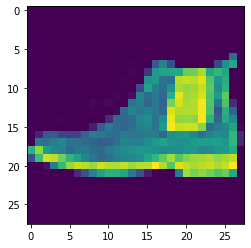

In [2]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = int(np.random.randint(0, 59999, 1))

print(int(img_index))

# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]

# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " - " +(fashion_mnist_labels[label_index]))

# Show one of the images from the training dataset
plt.imshow(x_train[img_index])

### Data Normalization

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Split the data into train/validation/test data sets and One-hot encoding the labels

In [4]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the shape of training, validation, and test datasets
print("x_train shape:", x_train.shape, "|", "y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape, "|", "y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape, "|", "y_test shape:", y_test.shape)

x_train shape: (55000, 28, 28, 1) | y_train shape: (55000, 10)
x_valid shape: (5000, 28, 28, 1) | y_valid shape: (5000, 10)
x_test shape: (10000, 28, 28, 1) | y_test shape: (10000, 10)


### Create Model Architecture

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

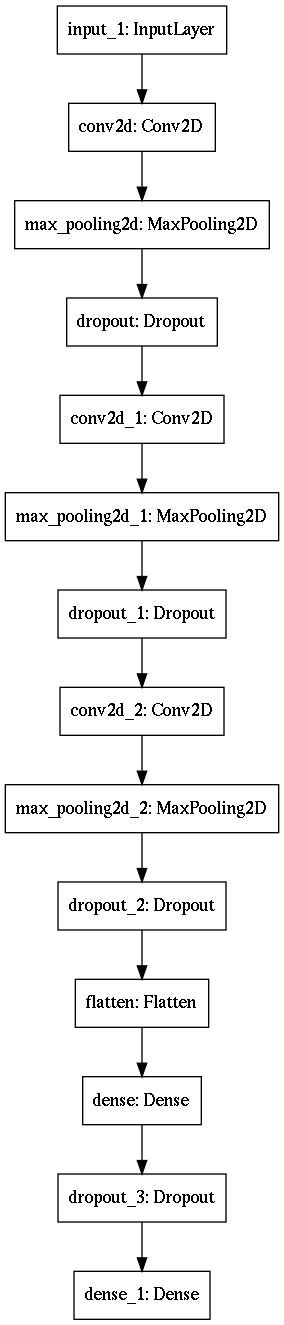

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.models import Model

inputs = Input(shape=(28, 28, 1))

layer_1 = Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')(inputs)
layer_1 = MaxPooling2D(pool_size=2)(layer_1)
layer_1 = Dropout(0.3)(layer_1)

layer_2 = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(layer_1)
layer_2 = MaxPooling2D(pool_size=2)(layer_2)
layer_2 = Dropout(0.3)(layer_2)

layer_3 = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(layer_2)
layer_3 = MaxPooling2D(pool_size=2)(layer_3)
layer_3 = Dropout(0.3)(layer_3)

final_layer = Flatten()(layer_3)
final_layer = Dense(256, activation='relu')(final_layer)
final_layer = Dropout(0.5)(final_layer)
final_layer = Dense(10, activation='softmax')(final_layer)

model = Model(inputs=inputs, outputs=final_layer)

# summarize layers
print(model.summary())

# plot graph
tf.keras.utils.plot_model(model, to_file='helper_images/fashion_mnist_cnn.png')

### Compile and Train our Model

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='models/model_weights_best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_valid, y_valid), callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54976/55000 [============================>.] - ETA: 0s - loss: 0.8050 - accuracy: 0.6968
Epoch 00001: val_loss improved from inf to 0.44718, saving model to models/model_weights_best.hdf5
55000/55000 [==============================] - 84s 2ms/sample - loss: 0.8053 - accuracy: 0.6967 - val_loss: 0.4472 - val_accuracy: 0.8432
Epoch 2/30
54976/55000 [============================>.] - ETA: 0s - loss: 0.5190 - accuracy: 0.8094
Epoch 00002: val_loss improved from 0.44718 to 0.36281, saving model to models/model_weights_best.hdf5
55000/55000 [==============================] - 87s 2ms/sample - loss: 0.5193 - accuracy: 0.8093 - val_loss: 0.3628 - val_accuracy: 0.8682
Epoch 3/30
54976/55000 [============================>.] - ETA: 0s - loss: 0.4458 - accuracy: 0.8364
Epoch 00003: val_loss improved from 0.36281 to 0.33886, saving model to models/model_weights_best.hdf5
55000/55000 [==============================] - 87s 2ms/sample - loss: 

### Load Model and Test Accuracy

In [10]:
# Load the weights with the best validation accuracy
model.load_weights('models/model_weights_best.hdf5')

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 91.5%


## Visualize the predictions

Now let's visualize the prediction using the model you just trained.

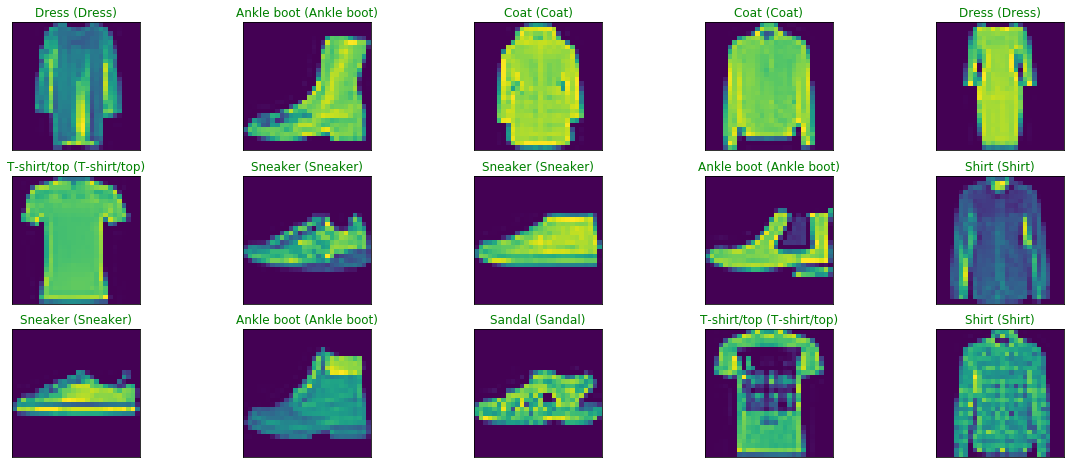

In [13]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Congratulations!

We have successfully trained a CNN to classify fashion-MNIST with near 90% accuracy.